<a href="https://www.kaggle.com/code/jimschacko/temperature-prediction-using-randomforest-hyptun?scriptVersionId=118505442" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('/kaggle/input/northern-hemisphere-monthly-temperature-1880-2022/monthly_temperature.csv')

In [4]:

dataset.shape

(1716, 3)

In [5]:
dataset.columns

Index(['Year', 'Month', 'Temperature'], dtype='object')

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

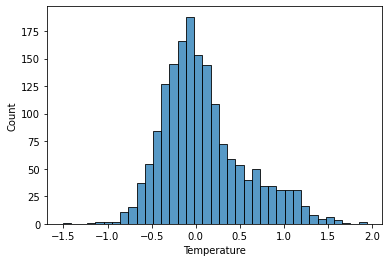

In [6]:
sns.histplot(dataset['Temperature'])

<Figure size 1800x1800 with 0 Axes>

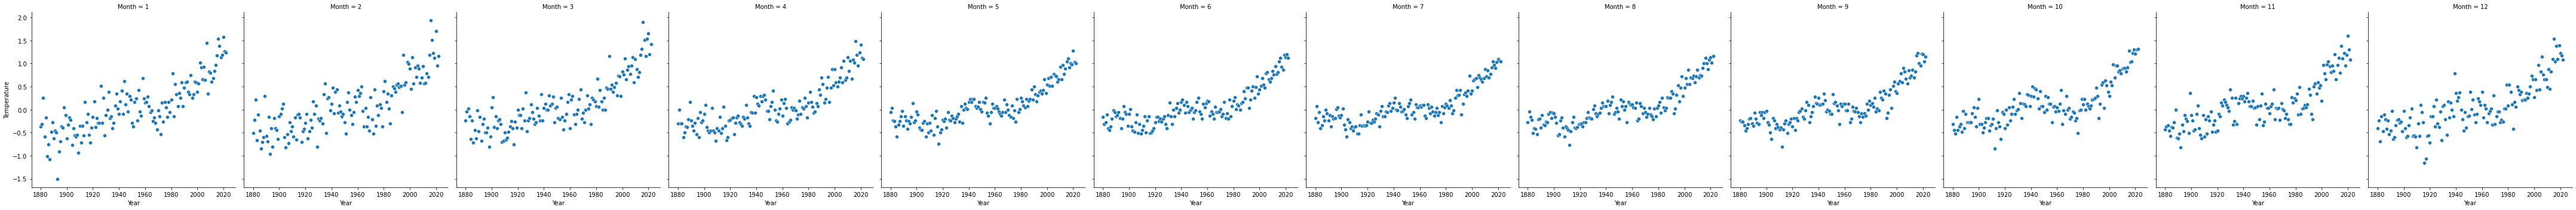

In [7]:
#Double click on the graph to incease their size.
plt.figure(figsize = (25,25))
sns.relplot(data = dataset, x = 'Year',y = 'Temperature' , col = 'Month')

<AxesSubplot:xlabel='Temperature'>

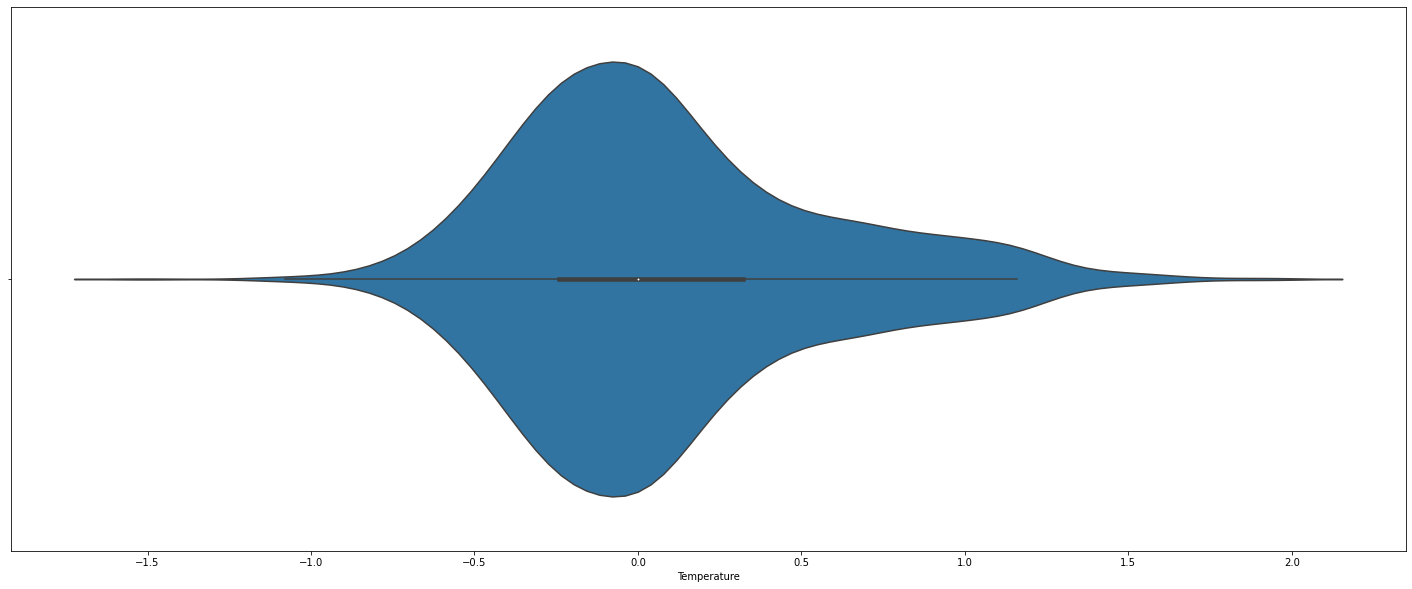

In [8]:
plt.figure(figsize = (25,10))
sns.violinplot("Temperature",hue = "Month", data=dataset)

<AxesSubplot:xlabel='Month', ylabel='Temperature'>

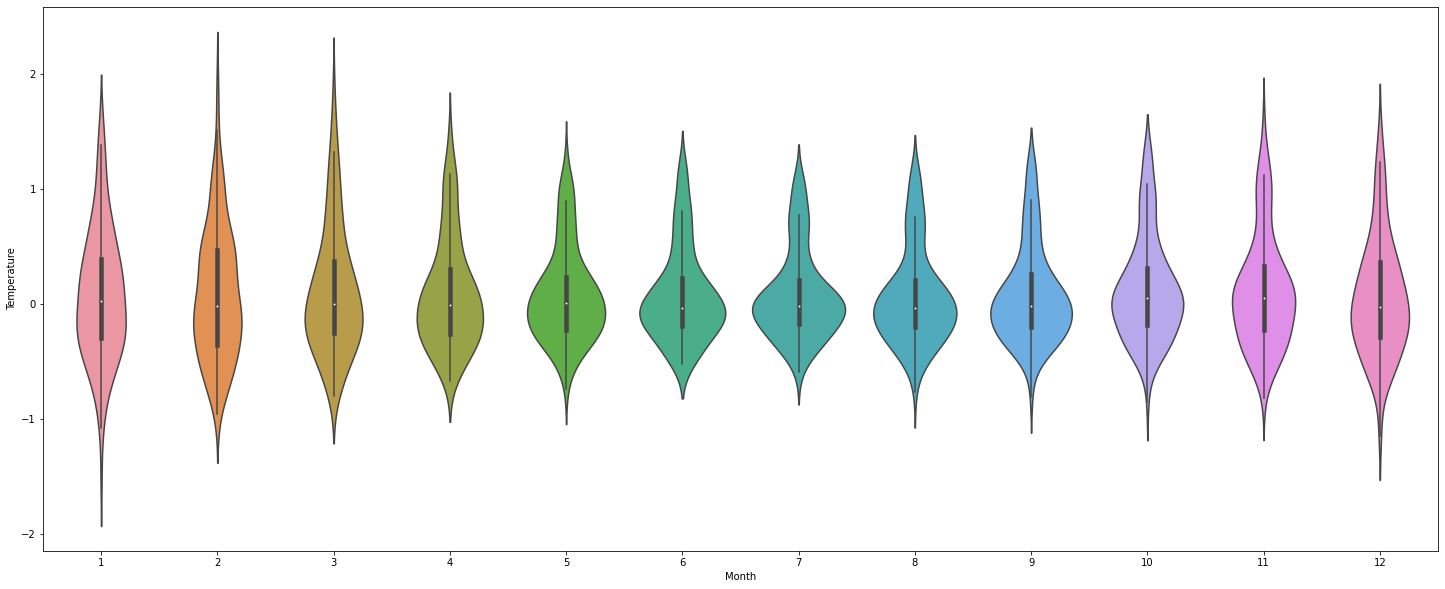

In [9]:
#Plotting for each month to see the variation in temperature
plt.figure(figsize = (25,10))
sns.violinplot("Month", "Temperature", data=dataset)

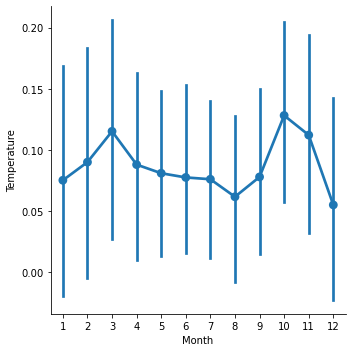

In [10]:
sns.factorplot("Month", "Temperature",data=dataset)

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

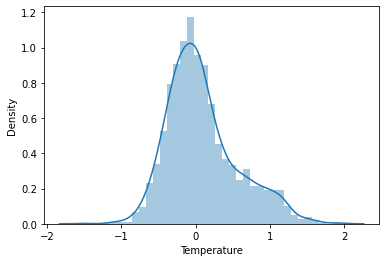

In [11]:
sns.distplot(dataset['Temperature'])

In [12]:
dataset.isnull().any()

Year           False
Month          False
Temperature    False
dtype: bool

In [13]:
dataset_2 = dataset.drop(columns = ['Temperature'])

<AxesSubplot:title={'center':' Correlation'}>

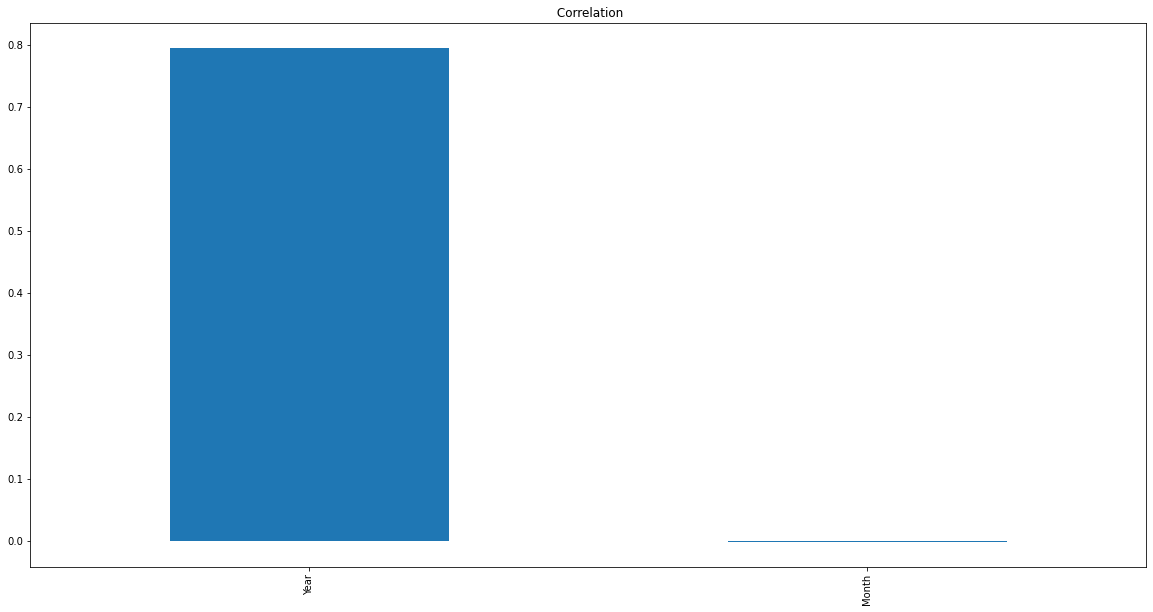

In [14]:
dataset_2.corrwith(dataset['Temperature']).plot.bar(figsize = (20,10), title = ' Correlation')

<AxesSubplot:>

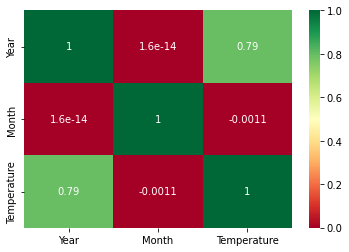

In [15]:
corr = dataset.corr()
sns.heatmap(corr, annot = True, cmap ='RdYlGn')

In [16]:
x = dataset.drop(columns = 'Temperature')
y = dataset['Temperature']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
from xgboost import XGBRFRegressor

In [20]:
xgb = XGBRFRegressor()
xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [21]:
y_pred = xgb.predict(x_test)
from sklearn.metrics import r2_score
score = r2_score(y_pred,y_test)
score

0.7252734190640113

In [22]:
#not a good model so we will try with random forest and linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
score = r2_score(y_pred,y_test)
score


0.4130284393007534

In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [25]:
y_pred = rfr.predict(x_test)
from sklearn.metrics import r2_score
score = r2_score(y_pred,y_test)
score


0.831647533209416

In [26]:
#we will use random forest and do the hypertuning to imporve its performance
from sklearn.model_selection import RandomizedSearchCV
parameters  = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
random_search = RandomizedSearchCV(rfr ,param_distributions = parameters, cv = 10, n_iter = 10,
                         n_jobs = -1, verbose = 3 )


In [27]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=3)

In [28]:
random_search.best_estimator_

RandomForestRegressor(max_depth=100, min_samples_leaf=2, n_estimators=400)

In [29]:
random_search.best_score_

0.8479531140232137

In [30]:
from sklearn.ensemble import RandomForestRegressor
final_model = RandomForestRegressor(max_depth=60, min_samples_split=10, n_estimators=2000)
final_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=60, min_samples_split=10, n_estimators=2000)

In [31]:
y_pred = final_model.predict(x_test)
from sklearn.metrics import r2_score
final_score = r2_score(y_pred,y_test)
final_score


0.8305914418037776

In [32]:
#cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(final_model, X=x_train, y = y_train, cv = 10)

In [33]:
print('Accuracy is {:2f}%'.format(accuracies.mean()*100))
print('Standard Deviation is {:2f}%'.format(accuracies.std()*100))


Accuracy is 84.522403%
Standard Deviation is 2.670169%


In [34]:
#Predicting temperature for year 2023 and January month
obs = [[2023,1]]
final_model.predict(obs)

array([1.2177215])

According to the model, the temperature of Januray 2023 would be 1.21° 

In [35]:
##Predicting temperature for year 2023 and February month
obs = [[2023,2]]
final_model.predict(obs)

array([1.22604359])

According to the model, the temperature of Februray 2023 would be 1.23°